In [19]:
# Dependencies 
import pandas as pd
from datetime import datetime
from bs4 import BeautifulSoup
import glob as glob

In [20]:
# Import alternate championhsip points tables
points_table_formula1 = pd.read_csv('points_systems_csv/2024_formula1_race_points_table.csv')
points_table_imsa = pd.read_csv('points_systems_csv/2024_imsa_race_points_table.csv')
points_table_imsa_qual = pd.read_csv('points_systems_csv/2024_imsa_qualifying_points_table.csv')

In [21]:
all_files_path = 'race_results_html/*.htm'
race_results_files = []
race_results_files = glob.glob(all_files_path)

season_races_df = pd.DataFrame()

# Initialize a list to contain the race results 
race_result_data = []
i = 0

for race_result_file in race_results_files:
# Get City / Race Name
    i += 1
    j = 0
    city = race_result_file.split('.')[0]
    city = city[18:]
# Read html file and store as html_content
    with open(race_result_file, 'r') as file:
        html_content = file.read()
    # Parse race result table html
    soup = BeautifulSoup(html_content, 'html.parser')
    race_table_html = soup.find(id = 'race-season')

# Loop through table html and parse to list
    for row in race_table_html.find_all('tr'):
        j += 1
        row_data = [cell.get_text(strip=True) for cell in row.find_all(['th', 'td'])]
        if j == 1 and i == 1:
            row_data_with_city = row_data + ['City']
            race_result_data.append(row_data_with_city)
        elif j != 1:
            row_data_with_city = row_data + [city]
            race_result_data.append(row_data_with_city)
        else:
            pass

    race_result_df = pd.DataFrame(race_result_data[1:], columns=race_result_data[0])
    race_result_df['Rank'] = race_result_df['Rank'].astype('int')
    race_result_df['Starts'] = race_result_df['Starts'].astype('int')
    race_result_df['Laps'] = race_result_df['Laps'].astype('int')
    race_result_df['Laps Led'] = race_result_df['Laps'].astype('int')
    race_result_df['Points'] = race_result_df['Points'].astype('int')
    race_result_df['Pit stop'] = race_result_df['Pit stop'].astype('int64')

    race_result_df = pd.merge(race_result_df, points_table_formula1, on='Rank', how='inner')
    race_result_df = pd.merge(race_result_df, points_table_imsa, on='Rank', how='inner')
    race_result_df = pd.merge(race_result_df, points_table_imsa_qual, on='Starts', how='inner')
    race_result_df['Points (IMSA Scoring)'] = race_result_df['Points (IMSA Scoring)']+race_result_df['Points (IMSA Scoring) - Qualifying']
    race_result_df = race_result_df.drop(columns=['Points (IMSA Scoring) - Qualifying'])

    

race_result_df.sample(46)

,Rank,Driver,Car No.,Starts,Laps,Total time,Laps Led,Status,Points,Avg.Speed,Pit stop,City,Points (F1 Scoring),Points (IMSA Scoring)
56,3,Scott McLaughlin,3,8,55,01:45:08.0415,55,Running,38,125.993,3,roadamerica,15,323
464,26,Rinus VeeKay,21,20,72,01:39:43.0398,72,Mechanical,5,96.956,3,lagunaseca,0,61
326,23,Graham Rahal,15,14,161,01:25:07.1785,161,Mechanical,8,141.859,2,gateway,0,97
407,23,Felix Rosenqvist,60,3,63,01:10:40.7835,63,Mechanical,7,95.517,2,toronto,0,110
465,27,Luca Ghiotto,51,27,34,00:40:57.8112,34,Contact,5,111.453,1,lagunaseca,0,44
122,15,Sting Ray Robb,41,24,250,01:44:55.1414,250,Running,15,127.813,2,iowa1,0,167
452,14,Pietro Fittipaldi,30,24,95,02:04:24.6086,95,Running,16,102.537,4,lagunaseca,0,177
54,1,Will Power,12,5,55,01:45:00.0267,55,Running,51,126.154,3,roadamerica,25,376
167,6,Marcus Ericsson,28,10,110,01:56:14.9635,110,Running,28,111.505,3,portland,8,271
71,18,Alexander Rossi,7,9,55,01:46:15.0693,55,Running,12,124.669,3,roadamerica,0,152


In [22]:
# Get a list of cities from race_result_df and convert it to a data frame
race_numbers = race_result_df.groupby('City')['City'].count()
race_numbers_df = pd.DataFrame(race_numbers)

# Define each race's race number
race_numbers_df.at['stpetersburg', 'Race Number'] = 1
race_numbers_df.at['longbeach', 'Race Number'] = 2
race_numbers_df.at['barber', 'Race Number'] = 3
race_numbers_df.at['indyrc', 'Race Number'] = 4
race_numbers_df.at['indy500', 'Race Number'] = 5
race_numbers_df.at['detroit', 'Race Number'] = 6
race_numbers_df.at['roadamerica', 'Race Number'] = 7
race_numbers_df.at['lagunaseca', 'Race Number'] = 8
race_numbers_df.at['midohio', 'Race Number'] = 9
race_numbers_df.at['iowa1', 'Race Number'] = 10
race_numbers_df.at['iowa2', 'Race Number'] = 11
race_numbers_df.at['toronto', 'Race Number'] = 12
race_numbers_df.at['gateway', 'Race Number'] = 13
race_numbers_df.at['portland', 'Race Number'] = 14
race_numbers_df.at['milwaukee1', 'Race Number'] = 15
race_numbers_df.at['milwaukee2', 'Race Number'] = 16
race_numbers_df.at['nashville', 'Race Number'] = 17

#Clean the data frame
race_numbers_df['Race Number'] = race_numbers_df['Race Number'].astype('int64')
race_numbers_df = race_numbers_df.sort_values(by='Race Number')
race_numbers_df.rename(columns={'City': 'City2'}, inplace=True)
race_numbers_df.drop(columns=['City2'], inplace=True)
race_numbers_df = race_numbers_df.reset_index()

# Merge the data frames, thereby giving the race_result_df dataframe a race number 
race_result_df = pd.merge(race_result_df, race_numbers_df, on='City', how='inner')
race_result_df

,Rank,Driver,Car No.,Starts,Laps,Total time,Laps Led,Status,Points,Avg.Speed,Pit stop,City,Points (F1 Scoring),Points (IMSA Scoring),Race Number
0,1,Scott Dixon,9,5,100,02:06:07.9684,100,Running,53,78.251,2,detroit,25,376,6
1,2,Marcus Ericsson,28,9,100,02:06:08.8251,100,Running,40,78.242,2,detroit,18,342,6
2,3,Marcus Armstrong,11,19,100,02:06:12.8813,100,Running,35,78.200,4,detroit,15,312,6
3,4,Kyle Kirkwood,27,6,100,02:06:14.0933,100,Running,33,78.188,2,detroit,12,305,6
4,5,Alexander Rossi,7,16,100,02:06:16.9216,100,Running,30,78.158,4,detroit,10,275,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,23,Kyffin Simpson,4,22,86,01:50:32.2312,86,Contact,7,104.472,3,lagunaseca,0,89,8
462,24,Graham Rahal,15,19,86,01:50:33.2600,86,Contact,6,104.456,4,lagunaseca,0,82,8
463,25,Jack Harvey,18,26,82,01:44:40.7853,82,Mechanical,5,105.187,3,lagunaseca,0,65,8
464,26,Rinus VeeKay,21,20,72,01:39:43.0398,72,Mechanical,5,96.956,3,lagunaseca,0,61,8


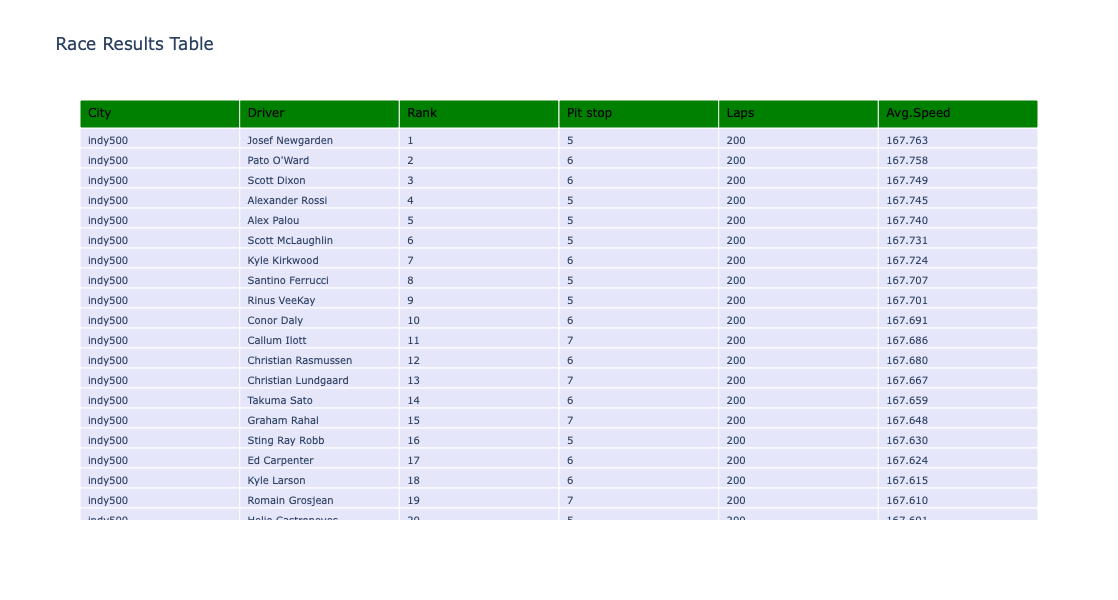

In [23]:
import plotly.graph_objects as go


df_filtered = race_result_df[['City','Driver', 'Rank', 'Pit stop', 'Laps', 'Avg.Speed']] 
df_filtered_indy500 =df_filtered[df_filtered['City'].str.lower() == 'indy500']

# Create a Plotly Table for the filtered data
table = go.Figure(data=[go.Table(
    header=dict(
        values=list(df_filtered.columns),  
        fill_color='green',  
        align='left',  
        font=dict(size=12, color='black')
    ),
    cells=dict(
        values=[df_filtered_indy500[col] for col in df_filtered_indy500.columns],  
        fill_color='lavender',  
        align='left', 
        font=dict(size=10)
    )
)])


table.update_layout(
    title="Race Results Table",
    height=600,  
    width=1000   
)

# Show the table
table.show()

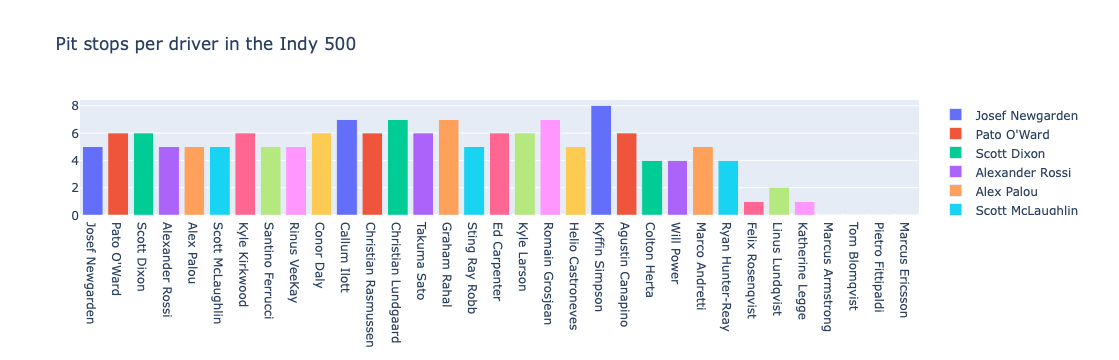

In [37]:
import plotly.graph_objects as go

# Filter the dataframe to only include Indy 500 data
df_filtered_indy500 = race_result_df[race_result_df['City'] == 'indy500']

fig = go.Figure()

# Get a list of unique drivers from the dataframe
drivers = df_filtered_indy500['Driver'].unique()


for driver in drivers:
    fig.add_trace(go.Bar(
        x=[driver],  
        y=df_filtered_indy500[df_filtered_indy500['Driver'] == driver]['Pit stop'],
        name=driver 
    ))

fig.update_layout(title='Pit stops per driver in the Indy 500')

# Show the figure
fig.show()

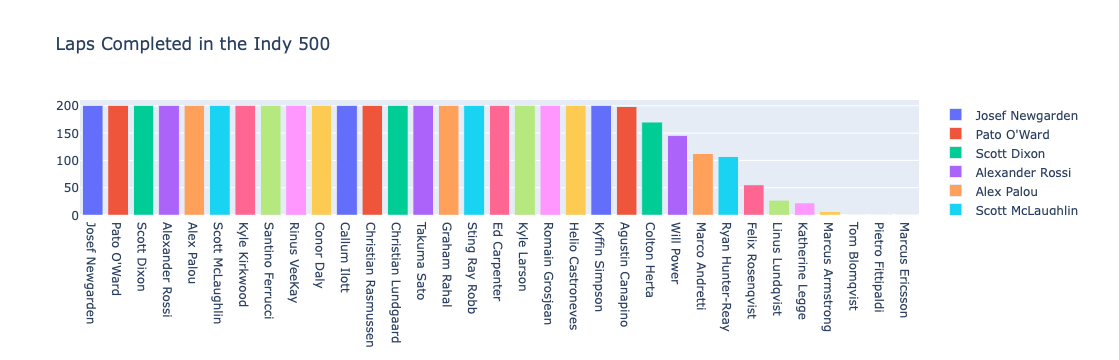

In [34]:
import plotly.graph_objects as go

# Filter the dataframe to only include Indy 500 data
df_filtered_indy500 = race_result_df[race_result_df['City'] == 'indy500']

fig = go.Figure()

# Get a list of unique drivers from the dataframe
drivers = df_filtered_indy500['Driver'].unique()


for driver in drivers:
    fig.add_trace(go.Bar(
        x=[driver],  
        y=df_filtered_indy500[df_filtered_indy500['Driver'] == driver]['Laps'],
        name=driver 
    ))

fig.update_layout(title='Laps Completed in the Indy 500')

# Show the figure
fig.show()
        

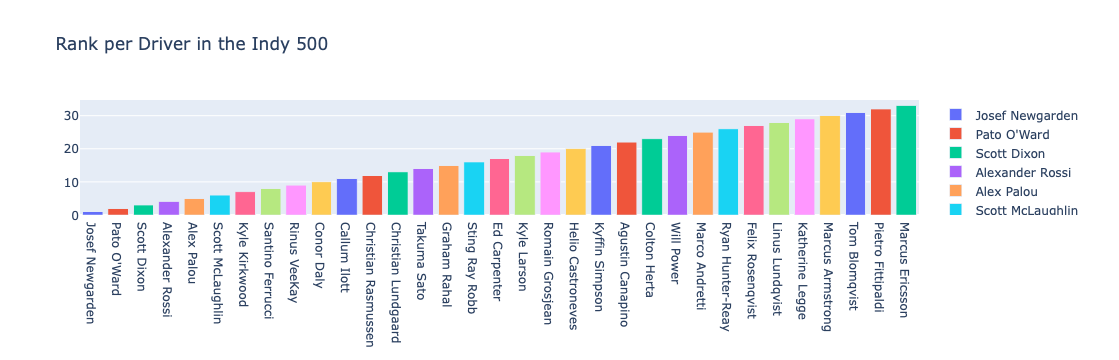

In [35]:
import plotly.graph_objects as go

# Filter the dataframe to only include Indy 500 data
df_filtered_indy500 = race_result_df[race_result_df['City'] == 'indy500']

fig = go.Figure()

# Get a list of unique drivers from the dataframe
drivers = df_filtered_indy500['Driver'].unique()


for driver in drivers:
    fig.add_trace(go.Bar(
        x=[driver],  
        y=df_filtered_indy500[df_filtered_indy500['Driver'] == driver]['Rank'],
        name=driver 
    ))

fig.update_layout(title='Rank per Driver in the Indy 500')

# Show the figure
fig.show()